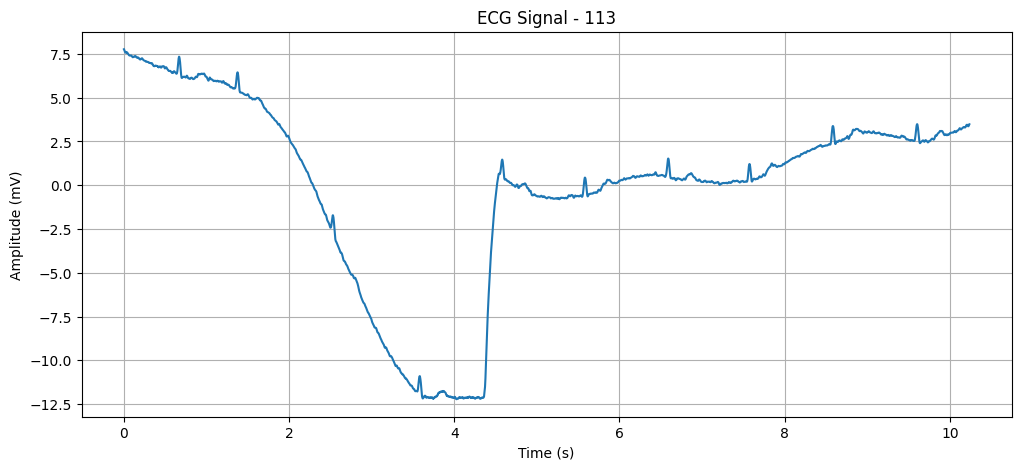

In [11]:
import wfdb
import matplotlib.pyplot as plt

# Specify the file name (without extension)
record_name = "113"  # Change this to match your file (without .dat/.hea)
path = "./training_data/"  # Adjust this if your files are in a different directory

# Load the record
record = wfdb.rdrecord(path + record_name)

# Extract signals and time
signals = record.p_signal
time = [i / record.fs for i in range(signals.shape[0])]  # Convert indices to time (in seconds)

# Plot the first ECG lead
plt.figure(figsize=(12, 5))
plt.plot(time, signals[:, 0])  # Assuming first lead
plt.xlabel("Time (s)")
plt.ylabel("Amplitude (mV)")
plt.title(f"ECG Signal - {record_name}")
plt.grid()
plt.show()


In [12]:
signals

array([[ 7.767,  2.82 , -4.947, ...,  3.826,  3.948,  4.367],
       [ 7.747,  2.801, -4.946, ...,  3.811,  3.934,  4.353],
       [ 7.713,  2.783, -4.93 , ...,  3.803,  3.921,  4.337],
       ...,
       [ 3.432,  0.98 , -2.452, ...,  1.839,  1.746,  2.304],
       [ 3.458,  0.984, -2.474, ...,  1.827,  1.733,  2.286],
       [ 3.48 ,  0.982, -2.499, ...,  1.818,  1.718,  2.276]])

In [13]:
signals.shape

(4096, 12)

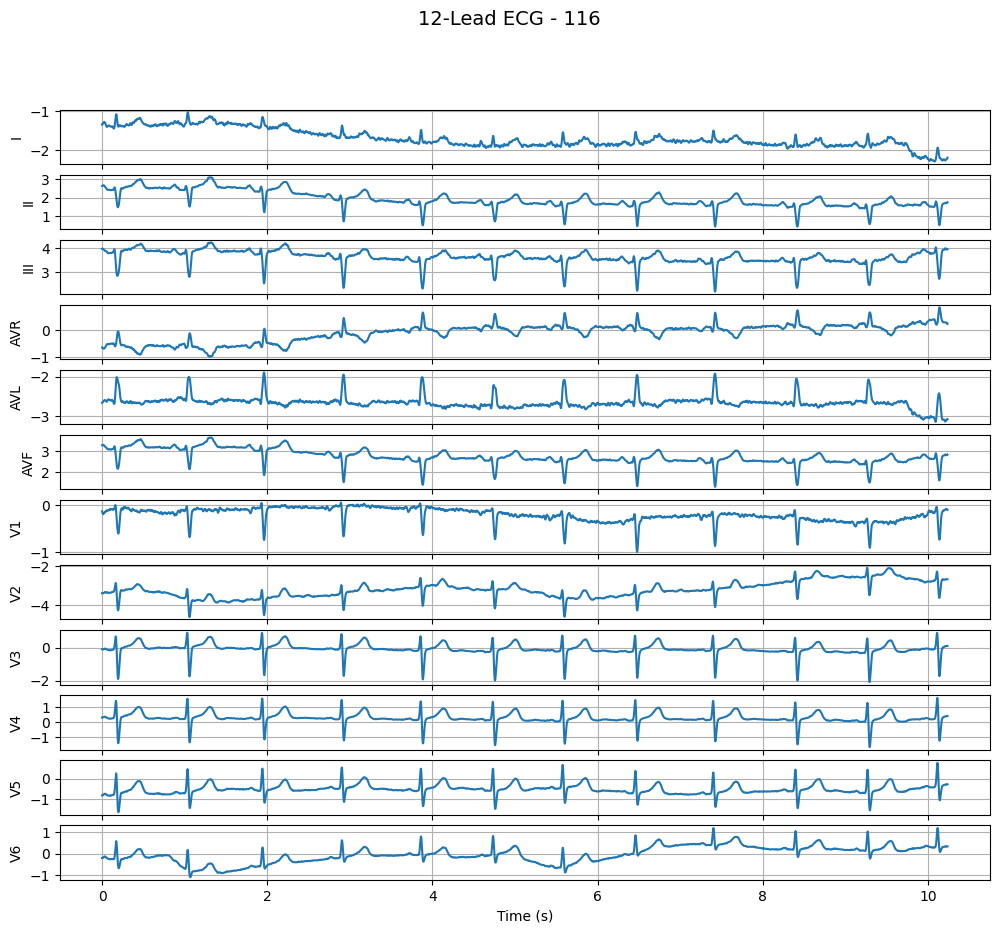

In [14]:
import wfdb
import matplotlib.pyplot as plt

# Load the record (Replace "your_file" with actual file name without extension)
record_name = "116"  # Update this with your actual file name
path = "./training_data/"  # Change if needed

# Read the ECG data
record = wfdb.rdrecord(path + record_name)

# Extract signals and metadata
signals = record.p_signal  # ECG signal values
fs = record.fs  # Sampling frequency
lead_names = record.sig_name  # Lead names
time = [i / fs for i in range(signals.shape[0])]  # Time in seconds

# Plot all leads
num_leads = signals.shape[1]  # Number of leads (should be 12 for a standard ECG)
fig, axes = plt.subplots(num_leads, 1, figsize=(12, 10), sharex=True)

for i in range(num_leads):
    axes[i].plot(time, signals[:, i])
    axes[i].set_ylabel(lead_names[i])  # Label each lead
    axes[i].grid()

axes[-1].set_xlabel("Time (s)")
plt.suptitle(f"12-Lead ECG - {record_name}", fontsize=14)
plt.show()


In [15]:
import os

def get_positive_chagas_files(directory):
    positive_files = []
    # Iterate through every file in the specified directory
    for filename in os.listdir(directory):
        if filename.endswith(".hea"):
            file_path = os.path.join(directory, filename)
            with open(file_path, 'r') as f:
                # Look for the line that contains the Chagas label
                for line in f:
                    if line.startswith("# Chagas label:"):
                        # Extract the label value after the colon and strip whitespace
                        label = line.split(":", 1)[1].strip()
                        if label.lower() == "true":
                            # Append the base file name (without extension)
                            positive_files.append(filename.replace(".hea", ""))
                        break  # Stop reading the file after finding the label
    return positive_files

def write_positive_files_to_txt(positive_files, output_file):
    with open(output_file, 'w') as f:
        for record in positive_files:
            f.write(record + "\n")

if __name__ == "__main__":
    # Specify the folder containing your .hea files
    folder_path = "./training_data"  # Adjust this to your folder path if needed
    positive_chagas = get_positive_chagas_files(folder_path)

    # Specify the output text file name
    output_filename = "positive_chagas.txt"
    write_positive_files_to_txt(positive_chagas, output_filename)

    print(f"Written {len(positive_chagas)} positive records to {output_filename}")


Written 402 positive records to positive_chagas.txt


Total positive records found: 402
Available record indices: 0 to 401
Plotting record: 4199725


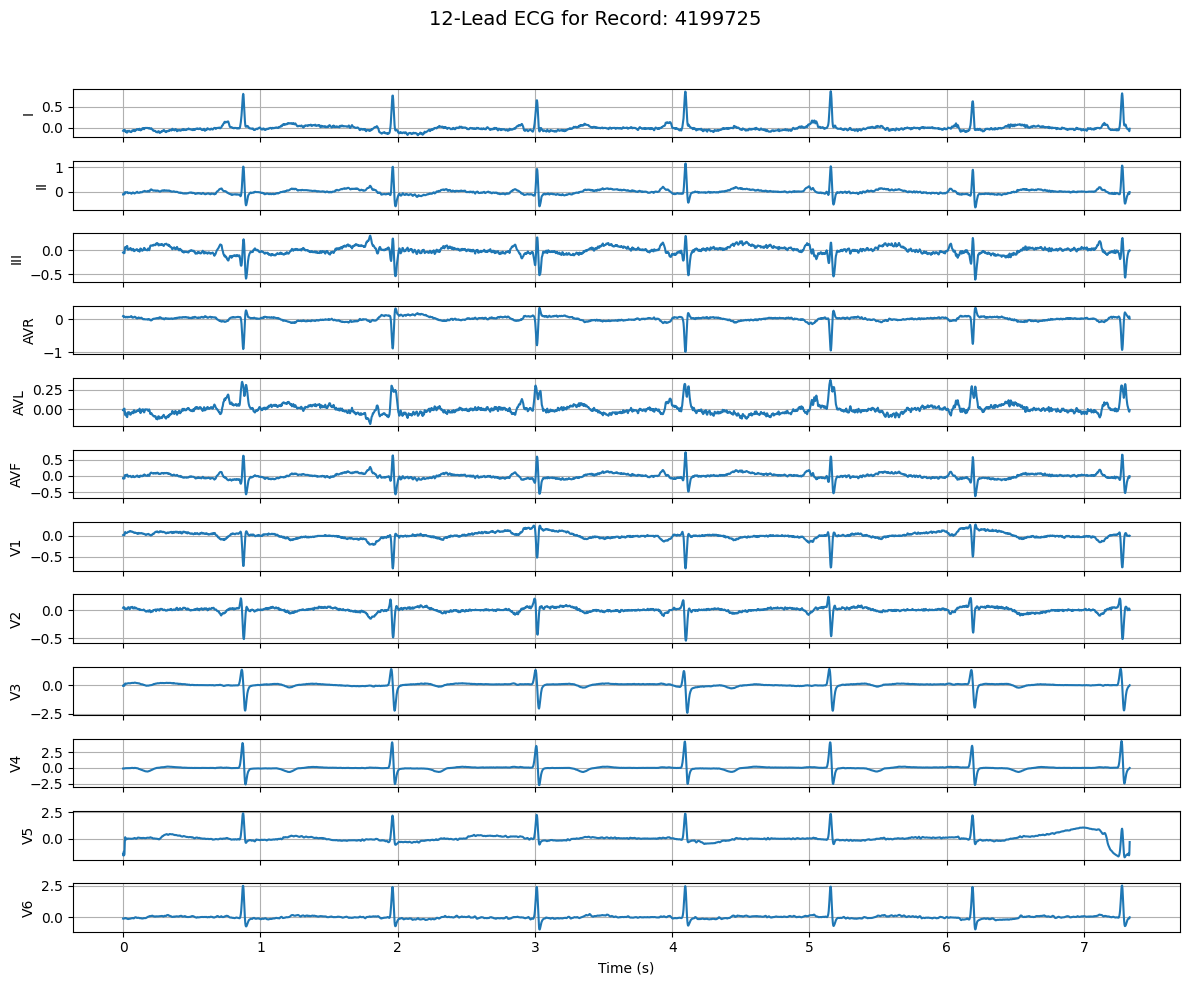

Plotting record: 2985818


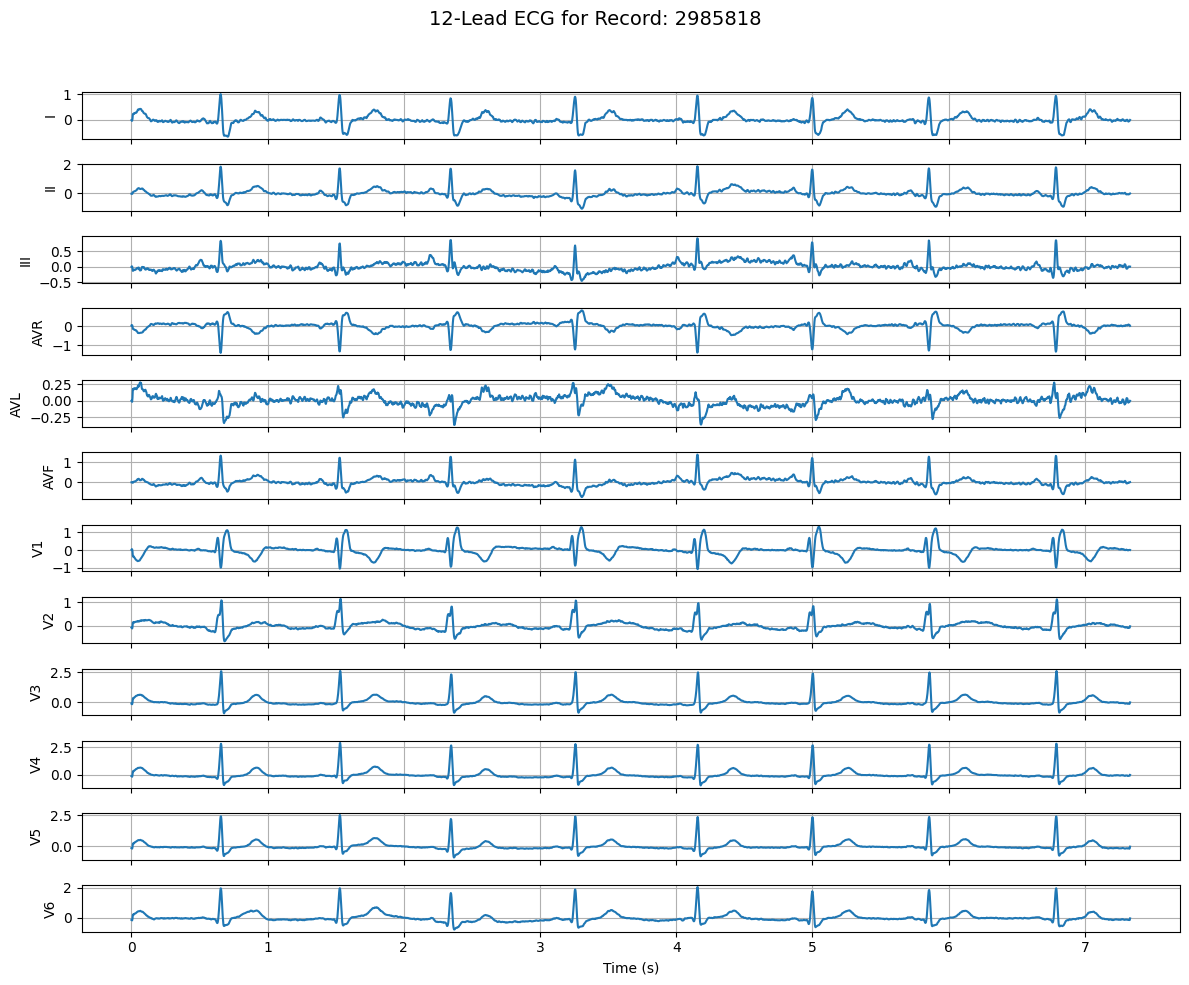

Plotting record: 631042


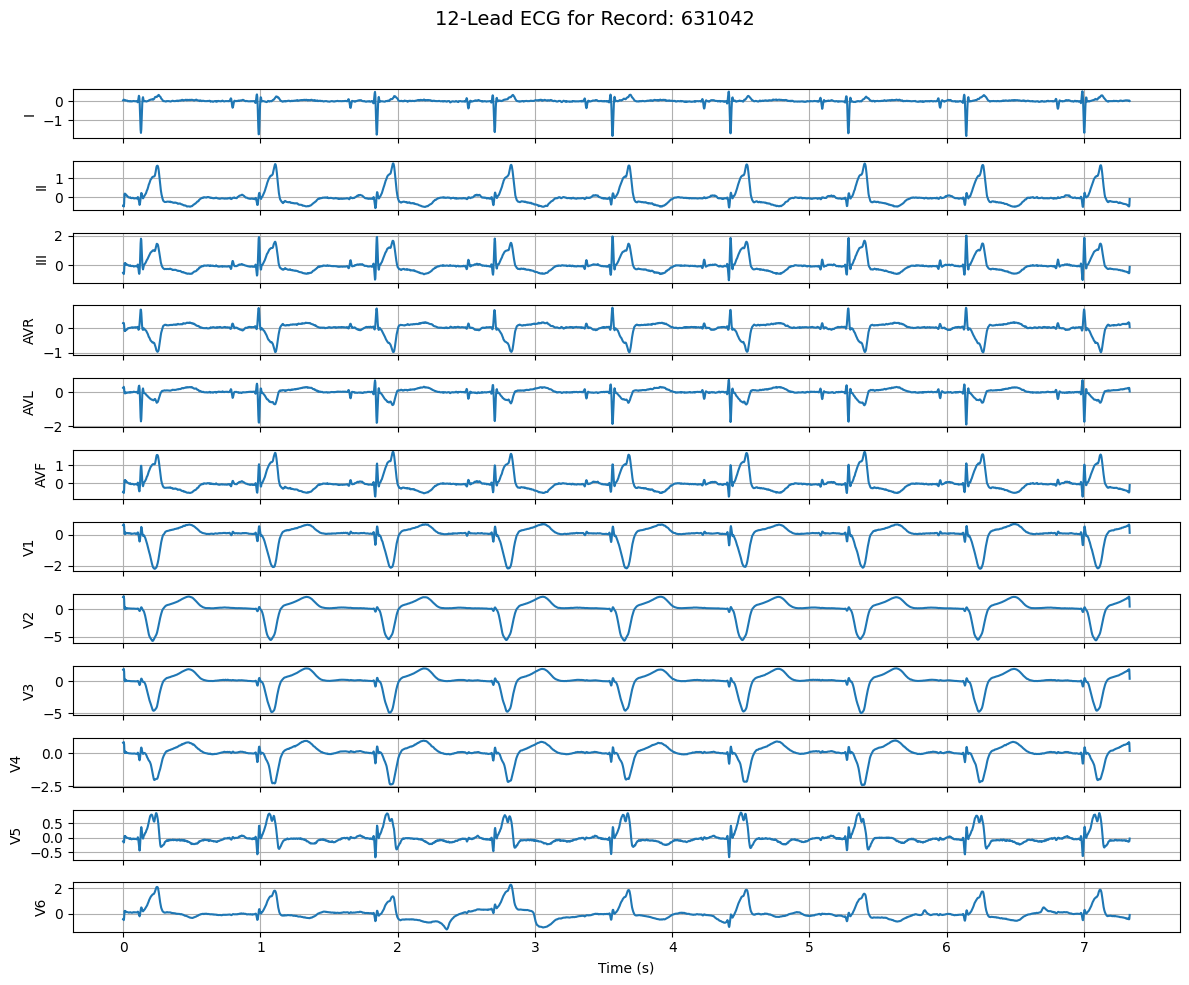

Plotting record: 950933


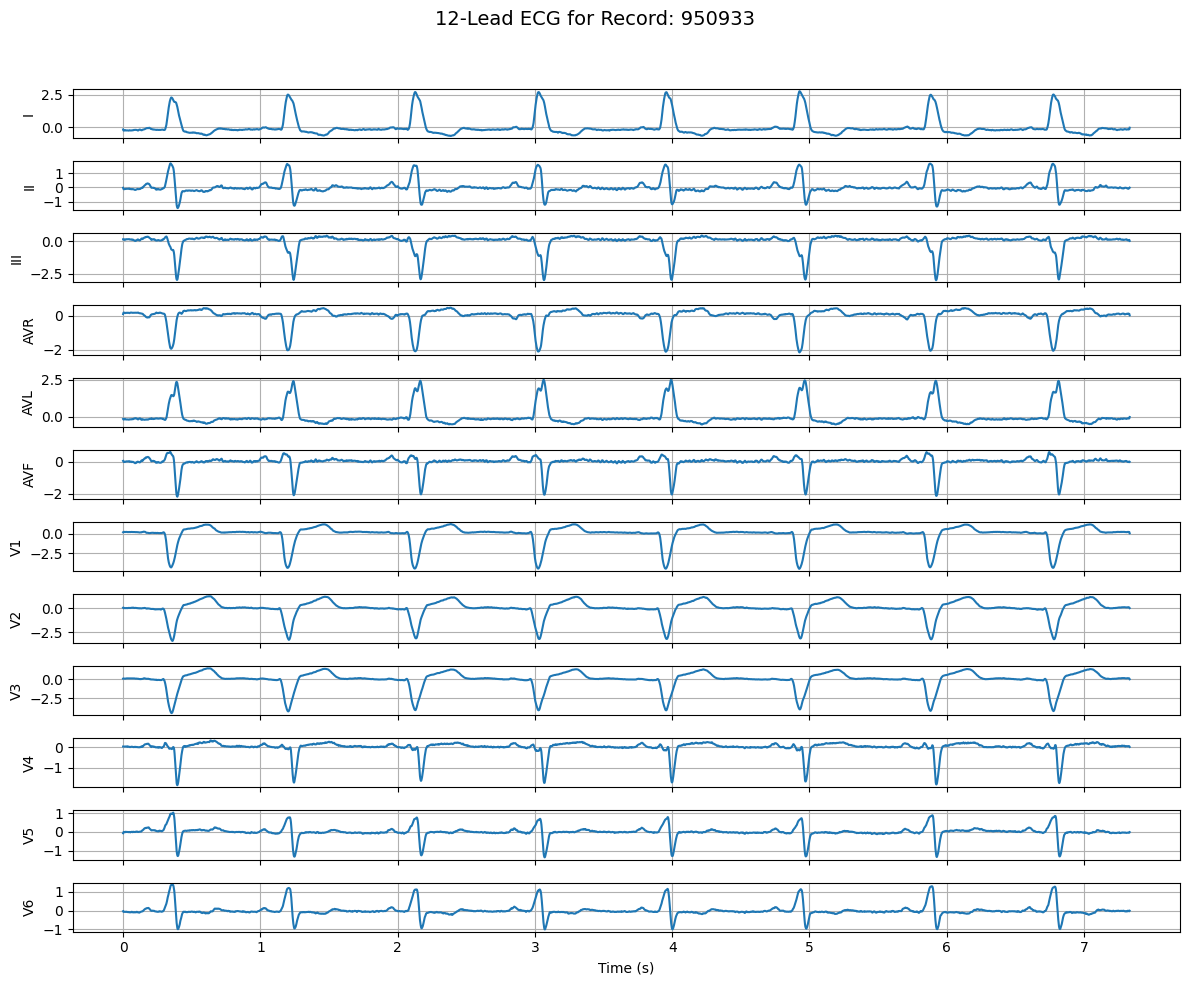

In [16]:
import os
import wfdb
import matplotlib.pyplot as plt

def read_positive_records(txt_file):
    """Read and return a list of positive record base names from a text file."""
    with open(txt_file, 'r') as f:
        # Each line corresponds to a record base name (without extension)
        records = [line.strip() for line in f if line.strip()]
    return records

def plot_12_lead_ecg(record_path, record_name):
    """Read a WFDB record and plot its 12-lead ECG in a single figure."""
    full_path = os.path.join(record_path, record_name)
    # Load the record (expects .dat and .hea in the same folder)
    record = wfdb.rdrecord(full_path)

    signals = record.p_signal       # shape: (n_samples, n_leads)
    fs = record.fs                  # sampling frequency
    lead_names = record.sig_name    # list of lead names

    # Create a time axis in seconds
    time = [i / fs for i in range(signals.shape[0])]

    # Set up subplots, one per lead
    num_leads = signals.shape[1]
    fig, axes = plt.subplots(num_leads, 1, figsize=(12, 10), sharex=True)

    # Ensure axes is iterable when only one lead exists
    if num_leads == 1:
        axes = [axes]

    for i in range(num_leads):
        axes[i].plot(time, signals[:, i])
        axes[i].set_ylabel(lead_names[i])
        axes[i].grid(True)

    axes[-1].set_xlabel("Time (s)")
    fig.suptitle(f"12-Lead ECG for Record: {record_name}", fontsize=14)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

# Specify the path to your text file containing positive Chagas record names
txt_file = "positive_chagas.txt"  # Adjust the path if needed

# Read the positive records
records = read_positive_records(txt_file)
print(f"Total positive records found: {len(records)}")
print("Available record indices: 0 to", len(records) - 1)

# Define the range of indices to process (change as desired)
start_idx = int(input("Enter start index: "))
end_idx = int(input("Enter end index (non-inclusive): "))

# Specify the folder where the WFDB records (.hea and .dat) are stored
record_folder = "./training_data"  # Change this if your files are stored elsewhere

# Loop through the specified range and plot each record's 12-lead ECG
for record_name in records[start_idx:end_idx]:
    print(f"Plotting record: {record_name}")
    plot_12_lead_ecg(record_folder, record_name)
